In [21]:
from data_loading import load_testing_data, get_key
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# When using a GPU, this command tells the sytem to allow memory allocation expansion
# The program may fail to run if not enough GPU memory is allowcated.
# (Borrowed from class materials: 14-cnn.ipynb)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print(physical_devices[0])
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [23]:
labels, images, labels_dict = load_testing_data()



# train_labels, test_labels = tf.keras.utils.split_dataset(labels, left_size=0.75, shuffle=False, seed=None)
# train_images, test_images = tf.keras.utils.split_dataset(images, left_size=0.75, shuffle=False, seed=None)

In [24]:
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.33, random_state=42)
train_images = (np.expand_dims(images_train, axis=-1)/255.).astype(np.float32)
train_labels = np.array((labels_train)).astype(np.int64)
test_images = (np.expand_dims(images_test, axis=-1)/255.).astype(np.float32)
test_labels = np.array((labels_test)).astype(np.int64)

TypeError: get_key() missing 1 required positional argument: 'dict'

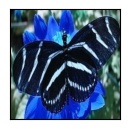

In [25]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(1000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(get_key(train_labels[image_ind], labels_dict))